<img src = images/hello.jpg width = '2000' height = '3700' >

In [1]:
!ls

## Data Preparation

### Importing Libraries

In [130]:
import xgboost
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics
import statsmodels.api as sm
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from statsmodels.formula.api import ols
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor
from imblearn.over_sampling import SMOTE 
from folium.plugins import FastMarkerCluster
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import mean_squared_error, mean_squared_log_error, roc_auc_score, plot_roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,\
RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss,\
classification_report, plot_confusion_matrix, roc_curve, auc


### Data Exploration

In [3]:
df = pd.read_csv('data/churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [5]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
df.isna().sum().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [8]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [9]:
# Fixing the column names
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [10]:
# Data observation: -
# We have a total of 3,333 rows and 21 columns.
# No missing data.
# The total number of customers who churned in our data is 483.
# Churn is imbalance. 

### Data Cleaning

In [11]:
# Copying the to a new variable called df_cleaned.
df_cleaned = df.copy()
df_cleaned.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [12]:
# Changing churn type from bool to int 0 and 1
# 1 is for True and 0 is False
df_cleaned['churn'] = df_cleaned['churn'].astype(int)
df_cleaned['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [13]:
# Dropping any unnecessary or identifiers column that we don't need.
# Like state, phone_number, and area_code.
df_cleaned = df_cleaned.drop(columns=['state','phone_number', 'area_code'], axis=1)

In [14]:
df_cleaned.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


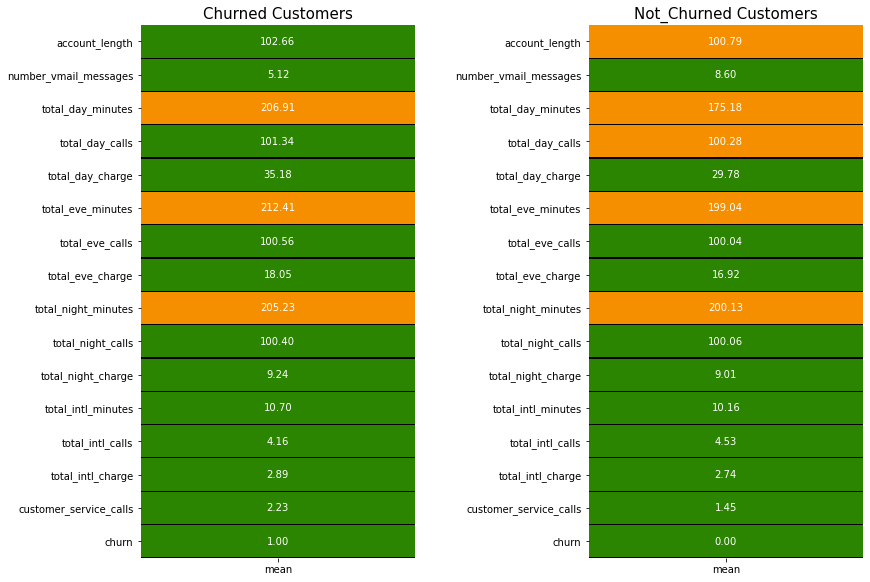

In [15]:
colors = ['#2b8500','#f58f00']

churn = df_cleaned[df_cleaned['churn'] == 1].describe().T
not_churn = df_cleaned[df_cleaned['churn'] == 0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (13,9))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']],annot = True,cmap = colors,linewidths = 0.2,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Churned Customers', size = 15);


plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot = True,cmap = colors,linewidths = 0.2,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Not_Churned Customers', size = 15);

fig.tight_layout(pad = 4)

In [16]:
# The table displace the mean values for customers who churned and customers who did not churn: -

# The mean total day minutes for customer who churned is 206.91, compared to those who didn't churn is 
# 175.18. This here tells me that customer's churned tend to have long conversations during the day.

# The total day charges for customers who churned is $35.18 compared to those who didn't which is $29.78.

# The mean total int calls charges for those who churned is $2.89 and those who did not is $2.74. 

# The mean customer service calls for churned customers is 2.23 vs not churned 1.45. 

/Users/benitofoxx/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


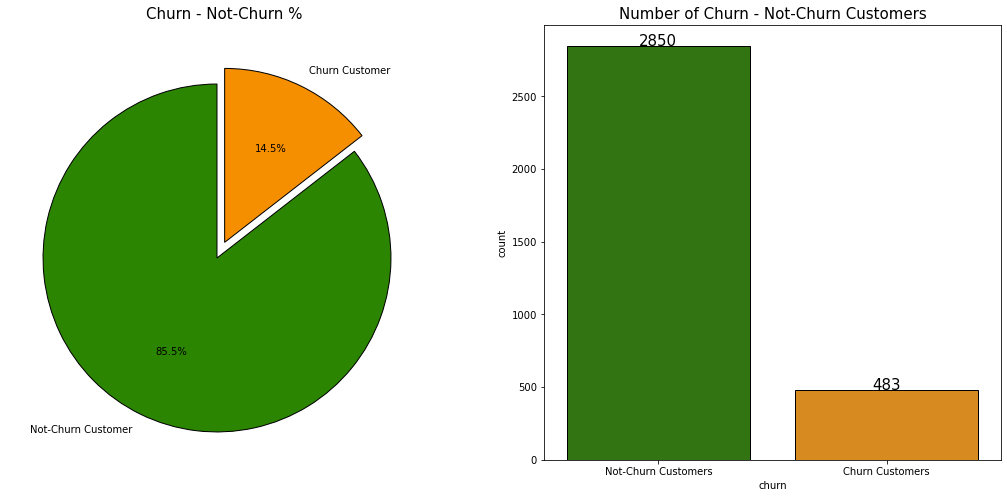

In [17]:
# Plotting a pie chart to get the percenatage of churned customers and not churned customers.

l = list(df_cleaned['churn'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (18,8))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['Not-Churn Customer','Churn Customer'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Churn - Not-Churn %', size = 15)

# Ploting a bar chart to get the total numbers of churned and not churned customers
plt.subplot(1,2,2)
ax = sns.countplot('churn',data = df_cleaned ,palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 15)
ax.set_xticklabels(['Not-Churn Customers','Churn Customers'])
    
plt.title('Number of Churn - Not-Churn Customers', size = 15);
plt.show()

In [18]:
# From our charts above we have 14.5% of customers who churned and 85.5 did not churn from the data provided.
# And in our bar chart the total number of customer who churned is 483 and not churned is 2850.
# This also tells us that our data is imabalance and our predictions will be biased.

In [19]:
# Separating Numerical columns from Categorical columns.
cols = list(df_cleaned.columns)
categorical_columns = []
numerical_columns = []
for data in cols:
    if len(df_cleaned[data].unique()) > 2:
        numerical_columns.append(data)
    else:
        categorical_columns.append(data)

print('Categorical Columns:',*categorical_columns)
print('''''')
print('Numerical Columns:',*numerical_columns)

Categorical Columns: international_plan voice_mail_plan churn

Numerical Columns: account_length number_vmail_messages total_day_minutes total_day_calls total_day_charge total_eve_minutes total_eve_calls total_eve_charge total_night_minutes total_night_calls total_night_charge total_intl_minutes total_intl_calls total_intl_charge customer_service_calls


In [20]:
# Removing the target (churn) from categorical columns for more EDA. 
categorical_columns.remove('churn')
categorical_columns

['international_plan', 'voice_mail_plan']

/Users/benitofoxx/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/benitofoxx/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


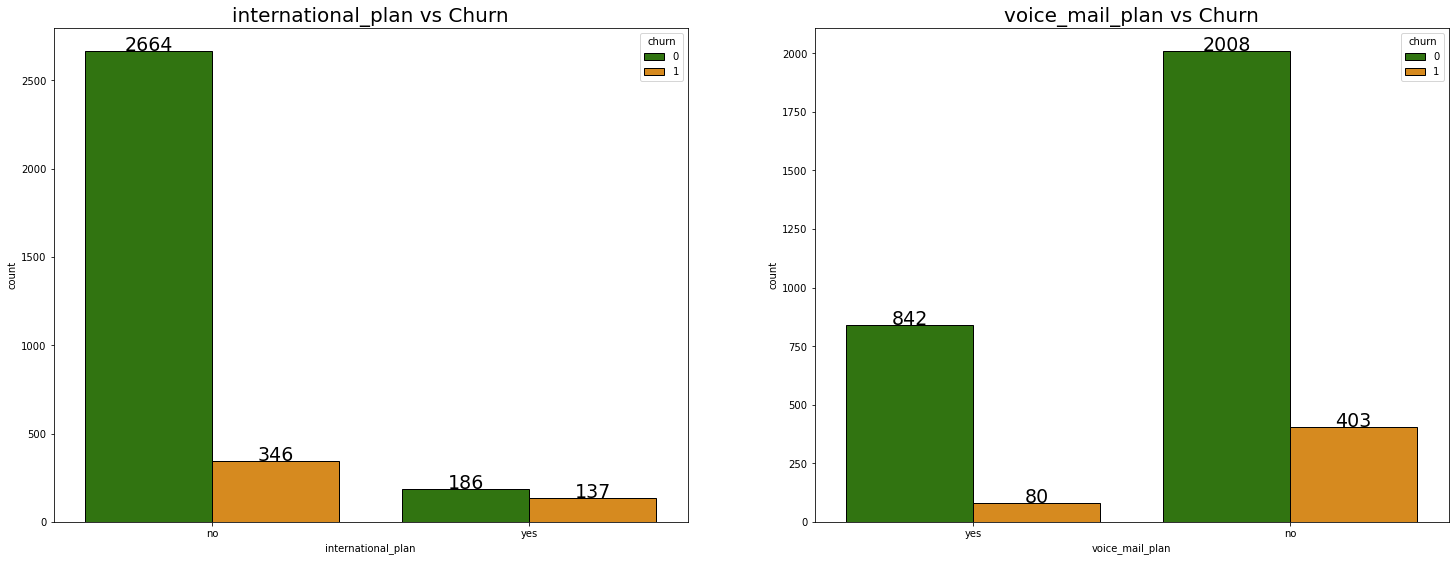

In [21]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (25,20))
for data in range(len(categorical_columns)):
    plt.subplot(2,2, data + 1)
    ax = sns.countplot(categorical_columns[data],data = df_cleaned, hue = "churn", palette = colors, edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment ='center', fontsize = 19)
    title = categorical_columns[data] + ' vs Churn'
    plt.title(title, size = 20);

In [22]:
# Out of 2664 of customer who doesn't have internal plan 346 churned.
# Out of 186 customer who have international plan 137 churned.
# Out of 2008 customer who doen't have voicemail plan 403 churned.
# Out of 842 customer who have voicemail plan 80 churned.

In [23]:
# Begining of models.
model_df = df_cleaned.copy()
model_df.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [24]:
# Slicing object type features
cont_features = [col for col in model_df.columns if model_df[col].dtype in [np.float64, np.int64]]
feature_df = model_df.loc[:, cont_features]
feature_df.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [25]:
# OneHotEncoding
ohe_cols = model_df[['international_plan', 'voice_mail_plan', 'customer_service_calls']]
ohe = OneHotEncoder()
ohe.fit(ohe_cols)

ohe_1 = ohe.transform(ohe_cols).toarray()

ohe_df = pd.DataFrame(ohe_1, columns=ohe.get_feature_names(ohe_cols.columns))
ohe_df.head()

,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes,customer_service_calls_0,customer_service_calls_1,customer_service_calls_2,customer_service_calls_3,customer_service_calls_4,customer_service_calls_5,customer_service_calls_6,customer_service_calls_7,customer_service_calls_8,customer_service_calls_9
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Combining all the cleaned data
df_model = pd.concat([pd.DataFrame(feature_df), ohe_df], axis=1)
df_model.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,customer_service_calls_0,customer_service_calls_1,customer_service_calls_2,customer_service_calls_3,customer_service_calls_4,customer_service_calls_5,customer_service_calls_6,customer_service_calls_7,customer_service_calls_8,customer_service_calls_9
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Creating a new variable for high customer service calls.
# 4 or more calls is high and anything under that is low.
cs_calls_high = df_model.apply(lambda x: x['customer_service_calls_4'] + x['customer_service_calls_5']
                              + x['customer_service_calls_6'] + x['customer_service_calls_7']
                            + x['customer_service_calls_8']+ x['customer_service_calls_9'], axis=1)

df_model['cs_calls_high'] = cs_calls_high

In [28]:
# Dropping redundant variables
df_model = df_model.drop(['customer_service_calls_0', 'customer_service_calls_1','customer_service_calls_2','customer_service_calls_3',
                     'customer_service_calls_4','customer_service_calls_5','customer_service_calls_6',
                     'customer_service_calls_7','customer_service_calls_8','customer_service_calls_9']
                    , axis=1)
df_model.head(2)

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes,cs_calls_high
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,10.0,3,2.7,1,0,1.0,0.0,0.0,1.0,0.0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,13.7,3,3.7,1,0,1.0,0.0,0.0,1.0,0.0


In [29]:
# Dropping all columns that might not be in use.
df_model = df_model.drop(['customer_service_calls','total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']
                          , axis=1)

### Modeling 

In [58]:
sm_1 = SMOTE(sampling_strategy = 1)
X_1 = df_model.drop('churn', axis = 1)
y_1 = df_model['churn']

# Fitting X and y variables to a SMOTE resample
X_1, y_1 = sm.fit_resample(X_1, y_1)
Counter(y_1)

Counter({0: 2850, 1: 2850})

In [59]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.25, random_state=42)

In [60]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train_1)
scaled_data_test = scaler.transform(X_test_1)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns = X_train_1.columns)
scaled_df_train.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes,cs_calls_high
0,0.243396,2.244015,0.024575,0.701232,-1.516462,0.739414,-1.385292,0.116223,-1.569810,3.302434,0.513207,-0.513207,-1.931285,1.931285,-0.475448
1,0.983732,-0.532139,-0.337675,-0.715978,-1.736559,0.847493,-0.310378,0.599856,0.288580,1.184854,0.513207,-0.513207,0.555691,-0.555691,-0.475448
2,-0.258975,-0.532139,-0.459869,-0.296064,-0.402943,1.063652,-1.127448,0.492382,0.294205,-0.932726,-0.789231,0.789231,0.555691,-0.555691,1.144328
3,-0.206094,-0.532139,1.280818,0.701232,0.341470,-1.422171,1.247831,-0.528621,0.326506,-0.509210,0.513207,-0.513207,0.555691,-0.555691,-0.475448
4,0.983732,-0.532139,-0.945856,-0.715978,-0.780824,0.523255,-0.193720,2.104492,1.881485,-0.509210,0.513207,-0.513207,0.555691,-0.555691,-0.475448


In [245]:
def get_metrics(clf, y_pred):
    
    clf_acc = accuracy_score(y_test, y_pred) * 100
    print('Accuracy is :{0}'.format(clf_acc))
    clf_rcl = recall_score(y_test, y_pred) * 100
    print('Recall is :{0}'.format(clf_rcl))
    clf_prcn = precision_score(y_test, y_pred) * 100
    print('Precision is :{0}'.format(clf_prcn))
    clf_f1 = f1_score(y_test, y_pred) * 100
    print('F1 Score is :{0}'.format(clf_f1))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    clf_roc_auc = auc(false_positive_rate, true_positive_rate)
    print('ROC AUC is :{0}'.format(round(clf_roc_auc, 2)))

In [83]:
scaled_pipeline_2 = Pipeline([('ss', StandardScaler()), 
                              ('RF', RandomForestClassifier(random_state = 123))])

In [84]:
grid = [{'RF__max_depth': [4, 5, 6], 
         'RF__min_samples_split': [2, 5, 10], 
         'RF__min_samples_leaf': [1, 3, 5]}]

In [85]:
# Define a grid search
gridsearch = GridSearchCV(estimator=scaled_pipeline_2, 
                          param_grid=grid, 
                          scoring='precision', 
                          cv=5)

In [86]:
# Fit the training data
gridsearch.fit(X_train_1, y_train_1)

# Print the accuracy on test set
gridsearch.score(X_test_1, y_test_1)

0.9107648725212465

In [146]:
# Dealing imbalance data using SMOTE
sm = SMOTE(sampling_strategy = 1)

# Defining my target
X = df_model.drop('churn', axis = 1)
y = df_model['churn']

# Fitting X and y variables to a SMOTE resample
X, y = sm.fit_resample(X, y)
Counter(y)

Counter({0: 2850, 1: 2850})

In [167]:
# Splitting my data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [268]:
# Function to get the validation score Roc curve score of a model.
def model(classifier,X_train, y_train, X_test, y_test):
    
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier, X_train, y_train, cv = cv, scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test, prediction)))
    plot_roc_curve(classifier, X_test, y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

# Model Evaluation.
def model_evaluation(classifier,X_test, y_test):
    
# Confusion Matrix the model.
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    fig, ax = plt.subplots(figsize=(12,9))
    ax = sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    ax.set_xlabel('\nPredicted Values',fontsize = 20)
    ax.set_ylabel('Actual Values ', fontsize=20)
    ax.xaxis.set_ticklabels(['Stayed','Churned'])
    ax.yaxis.set_ticklabels(['Stayed','Churned'])
    
# Classification Report
    print(classification_report(y_test, classifier.predict(X_test)))

#### First Model Decision Tree A

In [211]:
dt1 = DecisionTreeClassifier(random_state = 1000, max_depth = 4, min_samples_leaf = 1)

Cross Validation Score :  93.79%
ROC_AUC Score :  89.01%


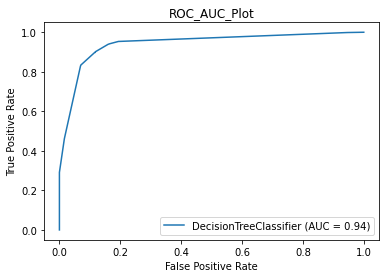

In [212]:
model(dt1, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       738
           1       0.88      0.90      0.89       687

    accuracy                           0.89      1425
   macro avg       0.89      0.89      0.89      1425
weighted avg       0.89      0.89      0.89      1425



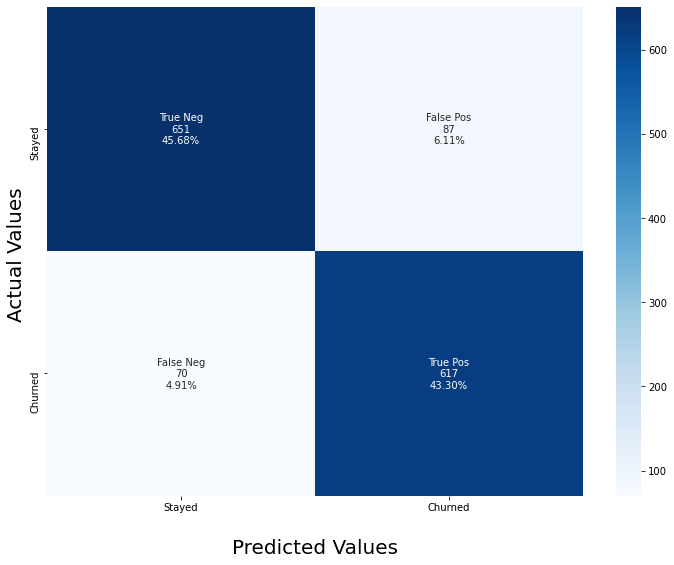

In [269]:
model_evaluation(dt1, X_test, y_test)

#### First Model Decision Tree B Using Grid Search

In [226]:
# Defining the grid
dt_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [227]:
dt2 = DecisionTreeClassifier(random_state = 23)

dt2_grid_search = GridSearchCV(dt2, dt_grid, cv = 3, scoring = 'precision')

# Fiting the data.
dt2_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=23),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             scoring='precision')

In [228]:
dt2_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 10}

In [237]:
dt2_pred = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, min_samples_split = 10,
                             min_samples_leaf = 2, class_weight = 'balanced', random_state = 23)
dt2_pred.fit(X_train, y_train)
dt2_y_pred = dt2_pred.predict(X_test)

In [246]:
get_metrics(dt2, dt2_y_pred)

Accuracy is :94.24561403508773
Recall is :94.32314410480349
Precision is :93.77713458755427
F1 Score is :94.04934687953556
ROC AUC is :0.94


In [249]:
dt2_cv_score = np.mean(cross_val_score(dt2, X_train, y_train, cv = 3))
dt2_cv_score

0.9260818713450293

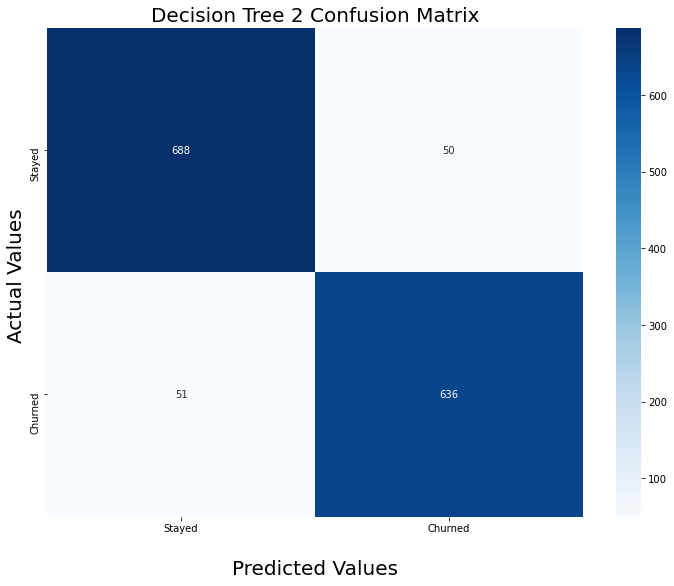

In [240]:
dt2_matrix = confusion_matrix(y_test, dt2_y_pred)

fig, ax = plt.subplots(figsize=(12,9))

ax = sns.heatmap(dt2_matrix, annot=True, cmap='Blues', fmt='d')

ax.set_title('Decision Tree 2 Confusion Matrix', fontsize = 20);
ax.set_xlabel('\nPredicted Values',fontsize = 20)
ax.set_ylabel('Actual Values ', fontsize=20);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Stayed','Churned'])
ax.yaxis.set_ticklabels(['Stayed','Churned'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### Second Model Random Forest A

In [205]:
rf1 = RandomForestClassifier(max_depth = 4, random_state = 42)

Cross Validation Score :  95.76%
ROC_AUC Score :  89.10%


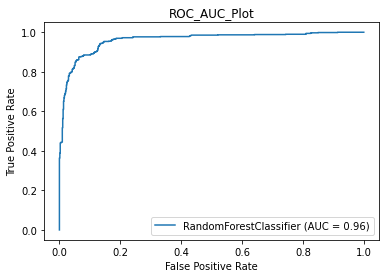

In [207]:
model(rf1, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       738
           1       0.87      0.90      0.89       687

    accuracy                           0.89      1425
   macro avg       0.89      0.89      0.89      1425
weighted avg       0.89      0.89      0.89      1425



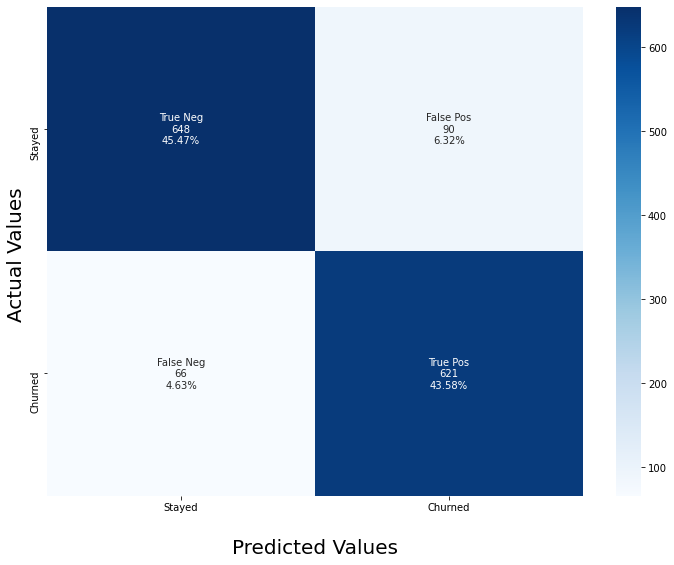

In [270]:
model_evaluation(rf1, X_test, y_test)

#### Second Model Random Forest B Using Grid Search

In [233]:
rf_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [234]:
rf2 = RandomForestClassifier(random_state = 42)

In [235]:
rf2_grid_search = GridSearchCV(estimator = rf2, param_grid = rf_grid, cv= 5)

In [236]:
rf2_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [241]:
rf2_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [247]:
rf2_pred = RandomForestClassifier(criterion = 'entropy', max_depth = 8, max_features = 'auto',
                             n_estimators = 500)
rf2_pred.fit(X_train, y_train)
rf2_y_pred = rf2_pred.predict(X_test)

In [248]:
get_metrics(rf2_pred, rf2_y_pred)

Accuracy is :94.17543859649122
Recall is :94.61426491994177
Precision is :93.39080459770115
F1 Score is :93.99855386840203
ROC AUC is :0.94


In [250]:
rf2_cv_score = np.mean(cross_val_score(rf2, X_train, y_train, cv = 3))
rf2_cv_score

0.9548538011695906

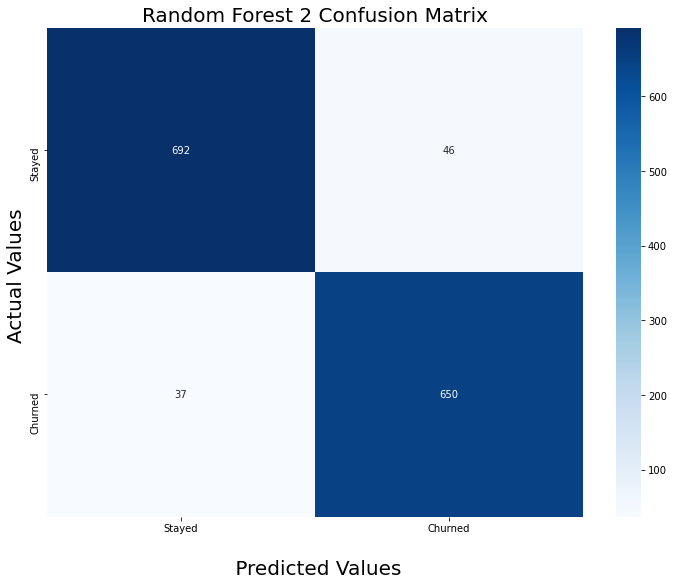

In [260]:
rf2_matrix = confusion_matrix(y_test, rf2_y_pred)

fig, ax = plt.subplots(figsize=(12,9))

ax = sns.heatmap(rf2_matrix, annot = True, cmap = 'Blues', fmt = 'd')

ax.set_title('Random Forest 2 Confusion Matrix', fontsize = 20);
ax.set_xlabel('\n Predicted Values',fontsize = 20)
ax.set_ylabel('Actual Values ', fontsize=20);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Stayed','Churned'])
ax.yaxis.set_ticklabels(['Stayed','Churned'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# The second Random Forest model so far looks better than all the models.

#### Third Model XGBoost

In [257]:
xgb1 = xgboost.XGBClassifier(learning_rate= 0.01, max_depth = 3, n_estimators = 1000)

Cross Validation Score :  97.80%
ROC_AUC Score :  94.83%


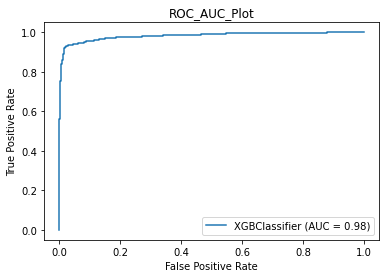

In [259]:
model(xgb1, X_train, y_train, X_test,y_test)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       738
           1       0.96      0.94      0.95       687

    accuracy                           0.95      1425
   macro avg       0.95      0.95      0.95      1425
weighted avg       0.95      0.95      0.95      1425



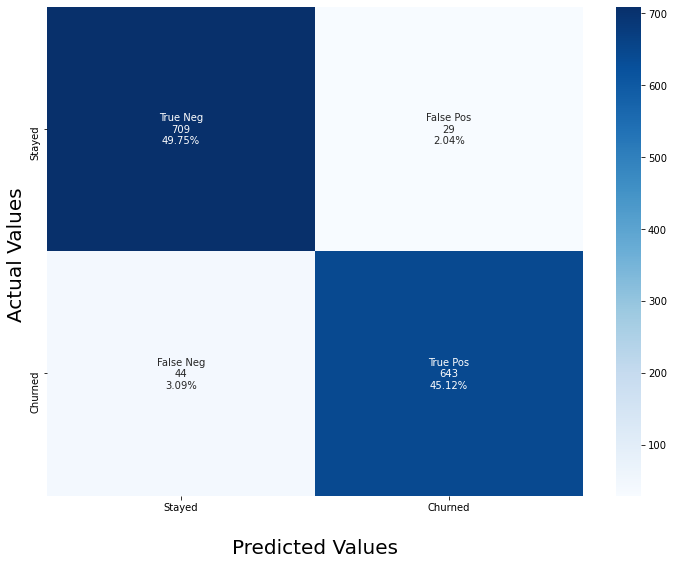

In [271]:
model_evaluation(xgb1, X_test, y_test)

In [263]:
# Final model prediction using Stack Classifier
stack = StackingClassifier(estimators = [('xgb1',xgb1),
                                         ('rf1',rf1),
                                         ('rf2', rf2),
                                         ('dt1',dt1),
                                         ('dt2', dt2 )],
                           final_estimator = xgb1)

Cross Validation Score :  98.75%
ROC_AUC Score :  97.03%


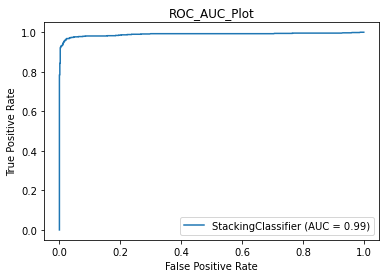

In [264]:
model(stack, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       738
           1       0.97      0.96      0.97       687

    accuracy                           0.97      1425
   macro avg       0.97      0.97      0.97      1425
weighted avg       0.97      0.97      0.97      1425



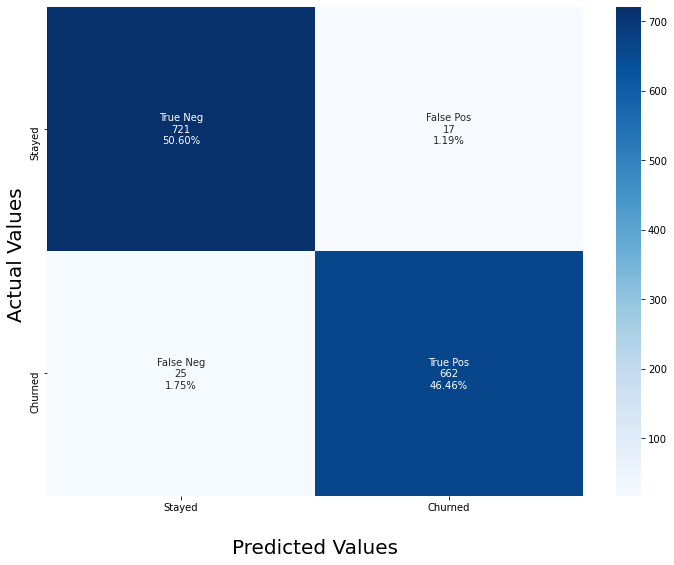

In [272]:
model_evaluation(stack, X_test, y_test)

In [45]:
# We used the stacking classifier above to get the final estimator for the final prediction.

#### Feature Importance

In [276]:
feature_importance = list(X)
feature_importance

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_eve_minutes',
 'total_eve_calls',
 'total_night_minutes',
 'total_night_calls',
 'total_intl_minutes',
 'total_intl_calls',
 'international_plan_no',
 'international_plan_yes',
 'voice_mail_plan_no',
 'voice_mail_plan_yes',
 'cs_calls_high']